In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, learning_curve

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [42]:
df = pd.read_csv("train.csv", na_values=["?", ""])
X, y = df.drop(columns="Cover_Type"), df["Cover_Type"]
np.any(df.isna())

np.False_

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

In [44]:
# TO FIND THE BEST ALGORITHM TO MAXIMIZE

# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', LogisticRegression()) #default model, replace by gridsearchcv with params_grid
# ])

# params_grid = [
#     {
#         'classifier': [RandomForestClassifier()],
#     },
#     {
#         'classifier': [GradientBoostingClassifier()],
#     },
#     {
#         'classifier': [KNeighborsClassifier()],
#     },
#     {
#         'classifier': [SVC()],
#     },
#     {
#         'classifier': [LogisticRegression(max_iter=10000, solver='lbfgs')],
#     
# ]
# best seems randomforestclassifier so test with params only in randomforestclassifier to optimize otherwise the pc crash 
# (tests are done in my pc not in specialized servers)
# 'mean_test_score': array([0.93151442, 0.87754383, 0.88699622, 0.83532019, 0.80878387]),

In [45]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier())
    #('rfc', RandomForestClassifier(n_estimators=150, min_samples_leaf=3, max_depth=5)) #default model, replace by gridsearchcv with params_grid
])

In [46]:
#params_grid = {
    #'rfc__n_estimators': [100, 200, 500],
    #'rfc__max_depth': [None, 10, 20, 30],
    #'rfc__min_samples_leaf': [1, 2, 5, 10],
#}

params_grid = {
    'rfc__n_estimators': [100, 200],  # nombre d'arbres
    'rfc__max_depth': [10, 20, 30],   # profondeur maximale des arbres
    'rfc__min_samples_leaf': [2, 5, 10],  # min d'échantillons dans une feuille
    'rfc__max_features': ['sqrt', 'log2'],  # nombre de features considérés à chaque split
    'rfc__bootstrap': [True],  # toujours vrai sauf cas particuliers
}

#params_grid = {
#    'rfc__n_estimators':[10, 50, 75],
#    'rfc__max_depth':[3,5,7],
#    'rfc__min_samples_leaf': [10,20,30],
#}




#best params: {'rfc__max_depth': None, 'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 200}

In [47]:
def Grid(pipe, params, X_train, y_train):
    clf = GridSearchCV(pipe, params, n_jobs=1, cv=5, verbose=2)
    clf.fit(X_train, y_train)
    return clf

In [48]:
clf = Grid(pipe, params_grid, X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=2, rfc__n_estimators=100; total time=   2.2s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=2, rfc__n_estimators=100; total time=   1.9s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=2, rfc__n_estimators=100; total time=   1.8s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=2, rfc__n_estimators=100; total time=   2.1s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=2, rfc__n_estimators=100; total time=   2.1s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=2, rfc__n_estimators=200; total time=   4.4s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=2, 

In [51]:
#best params: {'rfc__max_depth': None, 'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 200}
print(clf.best_score_, "\n")
clf.score(X_test, y_test)
#scores are similary <- good sign

0.9244065232852524 



0.9290702314445332

In [56]:
#matrix to do with names
labels = y_test.unique()
cm = confusion_matrix(y_test, clf.predict(X_test), labels=labels)
cm_df = pd.DataFrame(
    cm,
    index=pd.Index(labels, name='True label'),
    columns=pd.Index(labels, name='Predicted label'),
)
cm_df

Predicted label,5,2,1,4,6,3,7
True label,,,,,,,
5,429,28,10,0,8,8,0
2,35,5590,122,0,15,14,6
1,8,244,1753,0,0,1,25
4,0,0,0,422,5,5,0
6,3,0,0,18,352,59,0
3,4,1,0,26,51,350,0
7,0,0,15,0,0,0,417


In [55]:
train_sizes, train_scores, test_scores = learning_curve(
    clf.best_estimator_, X, y, cv=5, n_jobs=1, verbose=2
)

[learning_curve] Training set sizes: [ 4009 13031 22052 31074 40096]
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   4.7s
[CV] END .................................................... total time=   6.4s
[CV] END .................................................... total time=   7.6s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   6.0s
[CV] END .................................................... total time=   7.8s
[CV] END .................................................... total time=   0.9s
[CV] END ...............................

Text(0.5, 1.0, 'Learning Curves of Random Forest')

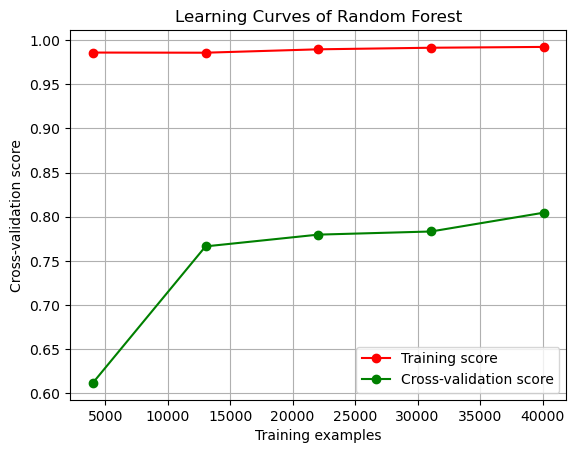

In [58]:
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', c="red", label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', c="green", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Cross-validation score")
plt.legend()
plt.grid(True)
plt.title("Learning Curves of Random Forest")

In [30]:
df_test = pd.read_csv("test.csv")

In [31]:
X_df_test, y_df_test = df_test.drop(columns="Cover_Type"), df_test["Cover_Type"]
clf.score(X_df_test, y_df_test)

0.7093099914860272